<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [FIT1] - Complexity Syndrome
<!-- DESC --> Illustration of the problem of complexity with the polynomial regression
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Visualizing and understanding under and overfitting
 
## What we're going to do :

We are looking for a polynomial function to approximate the observed series :  
$ y = a_n\cdot x^n + \dots + a_i\cdot x^i + \dots + a_1\cdot x + b $  


## Step 1 - Import and init

In [2]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
import fidle.pwk as ooo

ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.2.9
Run time             : Tuesday 18 February 2020, 17:23:05
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf


## Step 2 - Preparation of learning data :

Nombre de points : 100  a=[-1.40023862  1.64009905  1.89987647  1.24972783  1.17765272  1.90935391
  1.11259327] deg=7 bruit=2000


#### Before normalization :


Données d'aprentissage brute :
(100 points visibles sur 100)


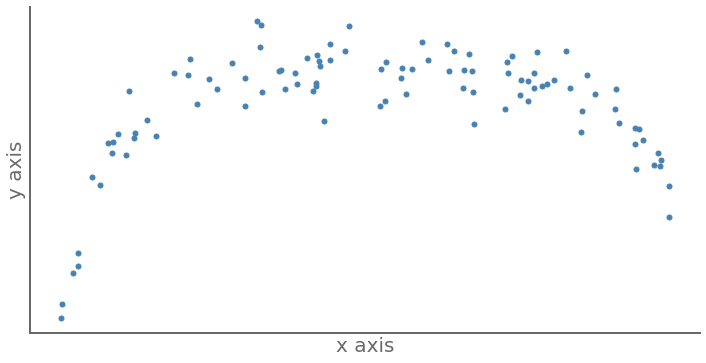

X        :      mean=     +0.2539  std=     +2.9283    min=     -4.9332    max=     +4.9177
Y        :      mean=  -2914.8537  std=  +5532.3607    min= -23848.6013    max=  +5139.0627


#### After normalization :


Données d'aprentissage normalisées :
(100 points visibles sur 100)


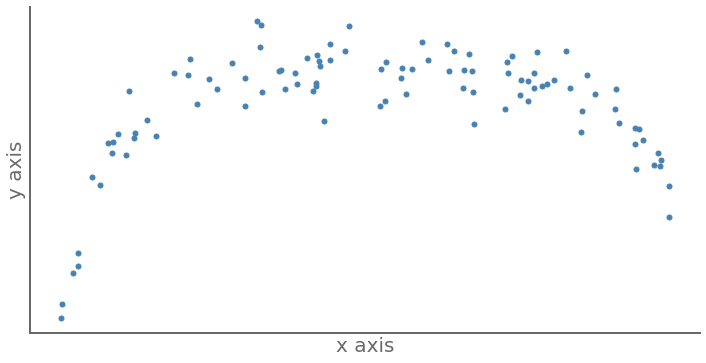

X_norm   :      mean=     +0.0000  std=     +1.0000    min=     -1.7714    max=     +1.5927
Y_norm   :      mean=     -0.0000  std=     +1.0000    min=     -3.7839    max=     +1.4558


In [15]:
# ---- Parameters

n         = 100

xob_min   = -5
xob_max   = 5

deg       =  7
a_min     = -2
a_max     =  2

noise     =  2000

# ---- Train data
#      X,Y              : data
#      X_norm,Y_norm    : normalized data

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

a = np.random.uniform(a_min,a_max, (deg,))
fy = np.poly1d( a )

Y = fy(X) + N

# ---- Data normalization
#
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# ---- Data visualization

width = 12
height = 6
nb_viz = min(2000,n)

def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))


print("Nombre de points : {}  a={} deg={} bruit={}".format(n,a,deg,noise))

ooo.display_md('#### Before normalization :')
print("\nDonnées d'aprentissage brute :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X',X)
vector_infos('Y',Y)

ooo.display_md('#### After normalization :')
print("\nDonnées d'aprentissage normalisées :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


## Step 3 - Polynomial regression with NumPy
### 3.1 - Underfitting

In [23]:
def draw_reg(X_norm, Y_norm, x_hat,fy_hat, size):
    plt.figure(figsize=size)
    plt.plot(X_norm, Y_norm, '.')

    x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

    plt.plot(x_hat, fy_hat(x_hat))
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.show()

Nombre de degrés : 1 a_hat=[ 2.15635737e-01 -1.26046371e-16]


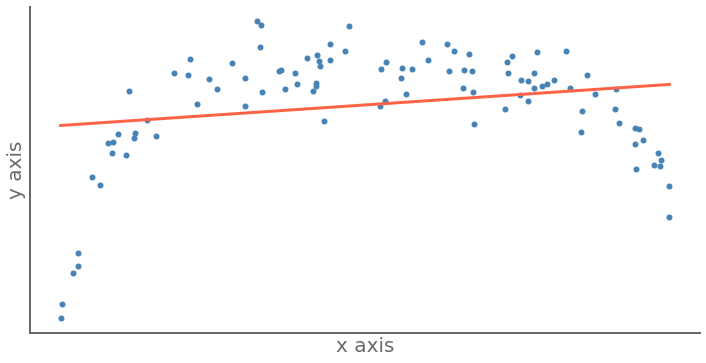

In [26]:
reg_deg=1

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], x_hat,fy_hat, (width,height))

### 3.2 - Good fitting

Nombre de degrés : 5 a_hat=[ 0.09676506 -0.49102546 -0.19674074  0.41539174 -0.00888844  0.51187173]


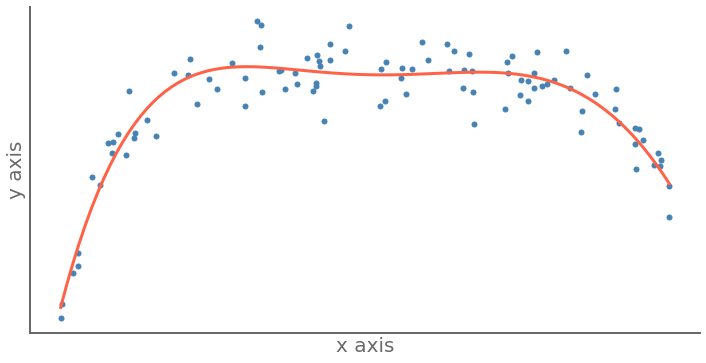

In [27]:
reg_deg=5

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], x_hat,fy_hat, (width,height))

### 3.3 - Overfitting

Nombre de degrés : 24 a_hat=[-3.39583761e-01  3.66524802e+00  1.35968152e+01 -5.33709389e+01
 -1.54708597e+02  3.43661072e+02  8.76139324e+02 -1.29075459e+03
 -2.93637308e+03  3.13537269e+03  6.25956959e+03 -5.14495063e+03
 -8.72124478e+03  5.75688179e+03  7.93008239e+03 -4.30734159e+03
 -4.57884398e+03  2.04404969e+03  1.58025869e+03 -5.55090657e+02
 -2.89374022e+02  7.05282858e+01  2.12619645e+01 -2.67799255e+00
  3.95718335e-01]


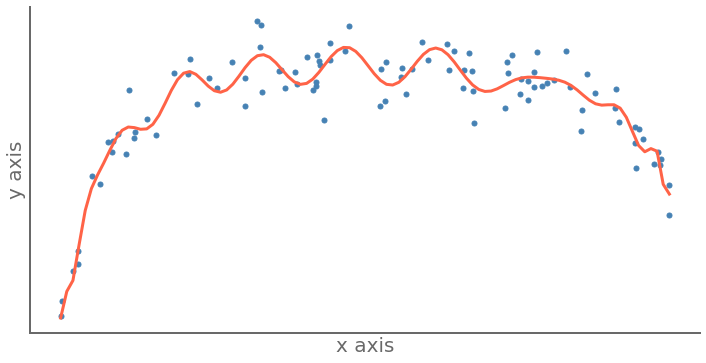

In [28]:
reg_deg=24

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], x_hat,fy_hat, (width,height))

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>